<a href="https://colab.research.google.com/github/sania-del/hello-world/blob/master/tweets_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The top trending hashtags in India are 
#ResignModi
#StatesmanNaveen
#ArrestSaketGokhale
#HawanKaraoModiJi
#COVIDSecondWaveInIndia
#DelhiCurfew
#DirectMSPInFarmersAccount
#મારું_પેજ_કોરોના_મુક્ત
#HarshVardhanShouldResign
#MarsHelicopter
#MissionUttarakhand
#ArrestSarwarChishty
#CSKvRR
#3YearsForBharatAneNenu
#CantW8For5G
#대화하쟈니
#TooMuchOxygen
#SuperLeague
#cancelapboardexams2021
#GullyRowdy
#लॉकडाउन
#AirtelTopPredictor


		WORDCLOUD OF THE TRENDING TOPICS IN INDIA




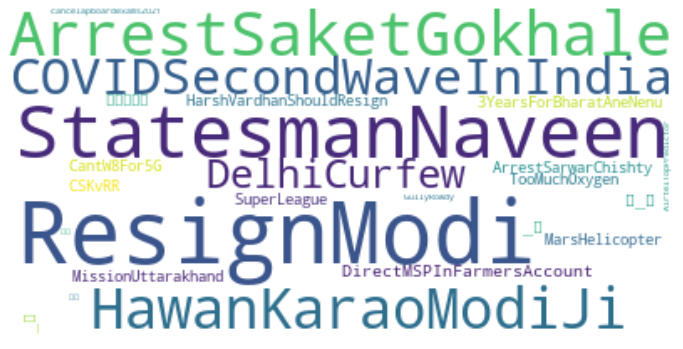



		WORD CLOUD OF THE TWEETS BY PM MODI




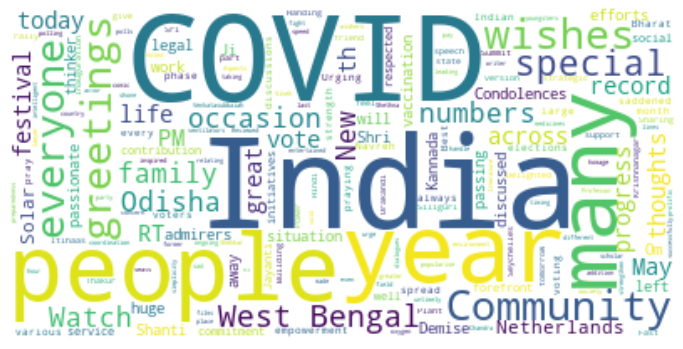



		WORD CLOUD OF THE CORONA RELATED TWEETS




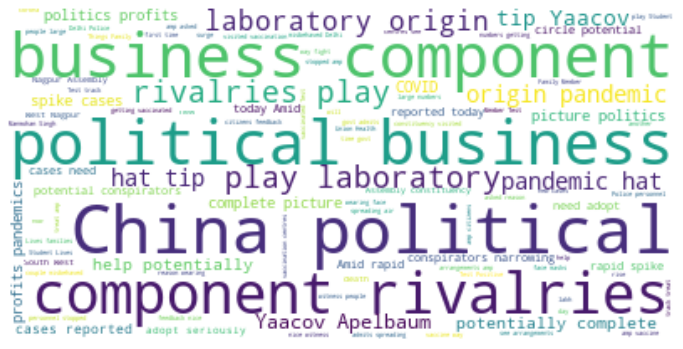

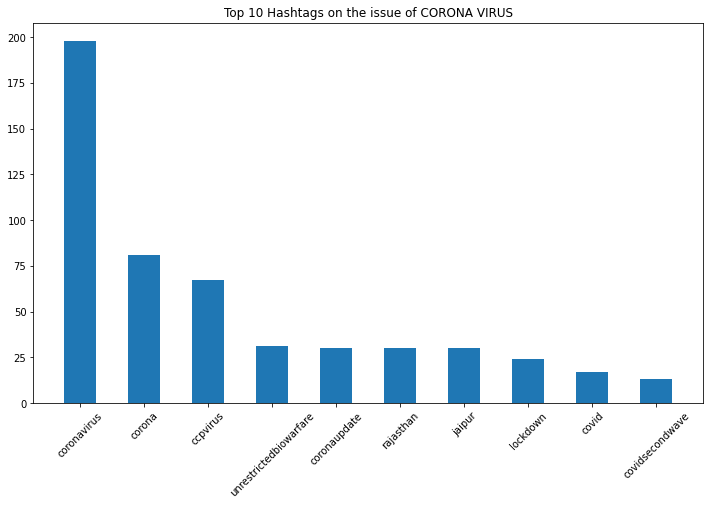

In [ ]:
#IMPORTING MODULES USED
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tweepy
import nltk
import nltk.corpus
import re
# TWITTER API
my_key = "EAITqddq7ZZjG11uXzGXgSX4F"
my_secretKey = "PzU0bZAJwTSHOSbzb8mKoLn1skTs9cBqq5igsn8dcCEiy0wcC5"
my_token = "1382767787353858052-QcWL8jEwn5yu31DuP655tQXj2hl0oF"
my_secretToken = "2WgQ5gi4E2P0yVK5Jf9Z91ZrxqPvvWDCa0LyYc9hiS6aW"
#AUTH API
auth = tweepy.OAuthHandler(my_key, my_secretKey)
auth.set_access_token(my_token, my_secretToken)

api = tweepy.API(auth)
#GETTING TRENDING APIS IN INDIA
woeid=23424848 #id for india
trends=api.trends_place(id=woeid)
#TOP TRENDING HASHTAGS IN INDIA
print("The top trending hashtags in India are ")
hashs=[]
for value in trends:
    for trend in value['trends']:
        if trend['name'][0]=="#":
            print(trend['name'])
            hashs.append(trend['name'])
l=""  #CONVERTING THE LIST TO STRING
for i in hashs:
     l += (str(i) + " ")

print("\n\n\t\tWORDCLOUD OF THE TRENDING TOPICS IN INDIA\n\n")

#WORDCLOUD OF THE TRENDING HASHTAGS
from wordcloud import WordCloud
wordcld = WordCloud(background_color = 'white').generate(l)
plt.figure(figsize=(12, 7))
plt.imshow(wordcld, interpolation='bilinear')
plt.axis("off")
plt.show()
#GETTING THE FOLLOWER COUNT OF PM'S TWITTER ID
user = api.get_user('narendramodi')
name = user.screen_name
#GETTING THE DATA OF HIS POSTS
posts=api.user_timeline(name,count=100,Lang='en',tweet_mode="extended")
#EXTRACTING ENGLISH TWEETS AND CONSTRUCTING A DATAFRAME
tweets=[]
for tweet in posts:
  if tweet.lang == "en":
    tweets.append(tweet.full_text)
Df=pd.DataFrame(tweets,columns=["Tweet"])
#CLEANING THE TWEETS
text = np.array(Df["Tweet"])

cleanedtext = [str(b) for b in text if str(b) != 'nan']
usertext = "".join(b for b in cleanedtext)
usertext = re.sub(r"\\n","", usertext)
usertext = re.sub(r"http\S+", "", usertext)
usertext = re.sub(r"@(\w+)","", usertext)
usertext = re.sub(r"#(\w+)","", usertext)
usertext = re.sub(r"(\w+).org","", usertext)
usertext = re.sub(r':',"", usertext)
usertext = re.sub(r"\\","", usertext)
usertext = re.sub(r"\d","", usertext)
usertext = re.sub(r".com$","", usertext)

print("\n\n\t\tWORD CLOUD OF THE TWEETS BY PM MODI\n\n")

#CONSTRUCTING A WORDCLOUD OF THE TWEETS
wordcld = WordCloud(background_color = 'white').generate(usertext)
plt.figure(figsize=(12, 7)) 
plt.imshow(wordcld, interpolation='bilinear')
plt.axis("off")
plt.show()

#CREATING A FUNCTION TO EXTRACT INFORMATION REGARDING A PARTICULAR HASHTAG
#IT CONTAINS THE USER ID, USERNAME, USERBIO, LIKES, RETWEETS, TEXT AND HASHTAGS
#THIS CAN WORK FOR OVER 20K IDS
#THE MORE DATA YOU WANT, THE MORE TIME IT TAKES

def trendTweets(hashtag):
    
    ml = []
    for tweet in tweepy.Cursor(api.search, q=hashtag, lang="en", tweet_mode='extended',wait_on_rate_limit=True).items(500):

        ids = tweet.id
        username = tweet.user.screen_name
        description = tweet.user.description
        likes = tweet.favorite_count
        retweets = tweet.retweet_count
        hashtags = tweet.entities['hashtags']
        
        try:
            text = tweet.retweeted_status.full_text
        except AttributeError:
            text = tweet.full_text
            
        ith_tweet = [ids, username, description, likes, retweets, text, hashtags]
    
        ml.append(ith_tweet)
        
    df = pd.DataFrame(ml[:],columns=["ID","Username", "Description", "Likes", "Retweets", "Text", "Hashtags"])
    
    return df
#COLLECTING THE TWEETS RELATED TO CORONAVIRUS 
#YOU CAN SAVE THE DATA IN A CSV FILE USING Df.to_csv 
df=trendTweets("#coronavirus")
#CLEANING THE DATA 
text = np.array(df["Text"])

cleanedtext = [str(b) for b in text if str(b) != 'nan']
usertext = "".join(b for b in cleanedtext)
usertext = re.sub(r"\\n","", usertext)
usertext = re.sub(r"http\S+", "", usertext)
usertext = re.sub(r"@(\w+)","", usertext)
usertext = re.sub(r"#(\w+)","", usertext)
usertext = re.sub(r"(\w+).org","", usertext)
usertext = re.sub(r':',"", usertext)
usertext = re.sub(r"\\","", usertext)
usertext = re.sub(r"\d","", usertext)
usertext = re.sub(r".com$","", usertext)

print("\n\n\t\tWORD CLOUD OF THE CORONA RELATED TWEETS\n\n")
#CONSTRUCTING THE WORD CLOUD OF THE TRENDS RELATED TO CORONAVIRUS
wordcld = WordCloud(background_color = 'white').generate(usertext)
plt.figure(figsize=(12, 7))
plt.imshow(wordcld, interpolation='bilinear')
plt.axis("off")
plt.show()
#COLLECTS THE HASHTAGS AND PUTS THEM INTO A LIST
hashCollection = []

for i in df["Hashtags"]:
    i = eval(str(i)) #CONVERTS THE LIST TO STRING
    for j in i:
        hashCollection.append(j["text"].lower())
print("\n\n")    
            
#COUNTS THE OCCURANCES OF HASHTAGS
from collections import Counter
sortedHashes = Counter(hashCollection)
top10Hashes = sortedHashes.most_common(11) #TO FIND TOP 10 HASHTAGS (USED 11 AS NO.1 WOULD BE #CORONAVIRUS)
#CONSTRUCTING A GRAPH OF THE TOP 10 HASHTAGS RELATED TO CORONA VIRUS
hashes10 = [t[0] for t in top10Hashes[1:]]
values10 = [t[1] for t in top10Hashes[1:]]
plt.figure(figsize=(12, 7))
plt.bar(hashes10, values10 ,align='center', width=0.5)
plt.xticks(rotation=45)
plt.title("Top 10 Hashtags on the issue of CORONA VIRUS")
plt.show()